In [2]:
import matplotlib.pyplot as plt

In [11]:
# import packages
import os
from cmdstanpy import cmdstan_path, CmdStanModel

# specify Stan program file
bernoulli_stan = os.path.join(r"C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab1\Exercise 2\bern_1.stan")

# instantiate the model; compiles the Stan program as needed.
bernoulli_model = CmdStanModel(stan_file=bernoulli_stan)

# inspect model object
print(bernoulli_model)

INFO:cmdstanpy:found newer exe file, not recompiling


CmdStanModel: name=bern_1
	 stan_file=C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab1\Exercise 2\bern_1.stan
	 exe_file=C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab1\Exercise 2\bern_1.exe
	 compiler_options=stanc_options={}, cpp_options={}


In [12]:
bernoulli_data = os.path.join(r"C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab1\Exercise 2\bernoulli.data.json")

# fit the model
bern_fit = bernoulli_model.sample(data=bernoulli_data, output_dir='.')

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [13]:
theta = bern_fit.stan_variable('theta')


(array([  4.,   6.,  23.,  52.,  92., 140., 198., 268., 350., 418., 450.,
        452., 410., 430., 294., 203., 122.,  57.,  21.,  10.]),
 array([0.138307  , 0.17838745, 0.2184679 , 0.25854835, 0.2986288 ,
        0.33870925, 0.3787897 , 0.41887015, 0.4589506 , 0.49903105,
        0.5391115 , 0.57919195, 0.6192724 , 0.65935285, 0.6994333 ,
        0.73951375, 0.7795942 , 0.81967465, 0.8597551 , 0.89983555,
        0.939916  ]),
 <BarContainer object of 20 artists>)

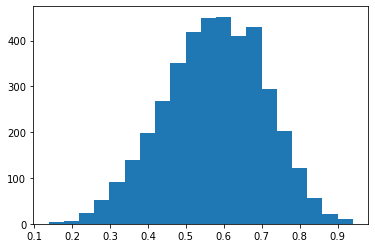

In [14]:
plt.hist(theta, bins=20)

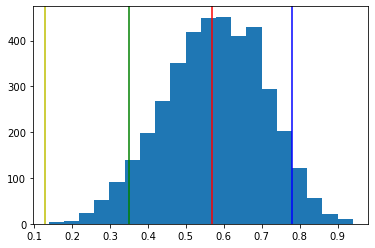

In [15]:
summary = bern_fit.summary()
summary = summary.iloc[1]
plt.hist(theta, bins=20)
plt.axvline(summary['Mean'], color='r')
plt.axvline(summary['StdDev'], color='y')
plt.axvline(summary['5%'], color='g')
plt.axvline(summary['95%'], color='b')
plt.show()